In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


### Datatypes

In [3]:
macro_data.dtypes

rgnp     float64
pgnp     float64
ulc      float64
gdfco    float64
gdf      float64
gdfim    float64
gdfcf    float64
gdfce    float64
dtype: object

### Duplicates

In [4]:
macro_data.duplicated().sum()

0

### Missing Values

In [5]:
macro_data.isna().sum()

rgnp     0
pgnp     0
ulc      0
gdfco    0
gdf      0
gdfim    0
gdfcf    0
gdfce    0
dtype: int64

### Descriptive Statistics

In [7]:
macro_data.describe().T

,count,mean,std,min,25%,50%,75%,max
rgnp,123.0,2747.097561,702.442330,1606.4,2223.75,2734.0,3213.20,4162.9
pgnp,123.0,2758.462602,735.028679,1608.3,2095.15,2743.4,3388.00,4068.4
ulc,123.0,98.286992,47.743734,47.5,53.40,81.5,151.25,187.4
gdfco,123.0,69.460163,31.724996,36.9,41.00,56.1,97.25,137.2
gdf,123.0,68.497561,30.188260,37.4,41.35,56.4,97.55,130.2
gdfim,123.0,59.397561,31.086507,26.6,29.25,53.7,95.75,111.1
gdfcf,123.0,66.262602,31.640044,32.2,37.00,58.5,98.25,129.9
gdfce,123.0,52.908130,31.600640,23.1,24.95,40.2,91.15,104.5


### Outliers

In [8]:
import seaborn as sns

<AxesSubplot:>

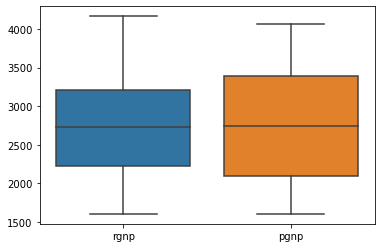

In [11]:
sns.boxplot(data= macro_data.iloc[:,:2])

<AxesSubplot:>

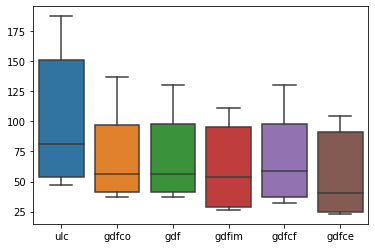

In [12]:
sns.boxplot(data= macro_data.iloc[:,2:])

-  No outliers

### Visualize the columns

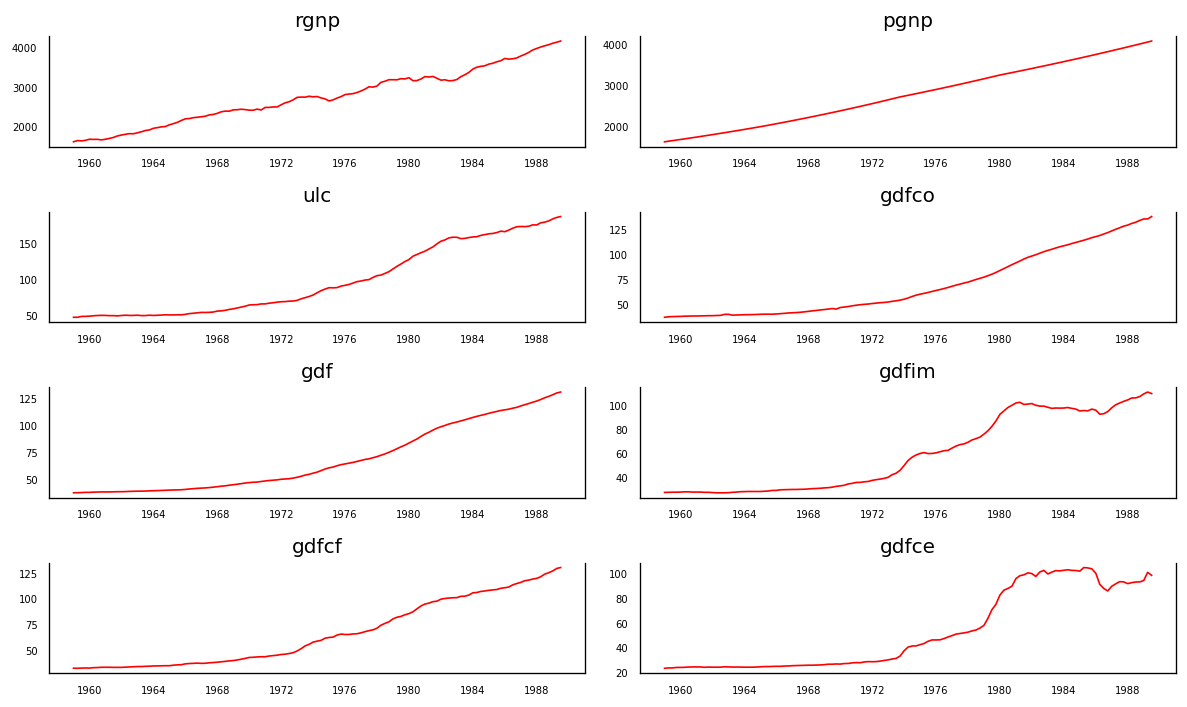

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Our Focus is on rgnp and ulc (for simplicity)

### Testing for Stationarity

In [15]:
ad_fuller_result_1 = adfuller(macro_data['rgnp'])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['ulc'])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: 0.6418816546694839
p-value: 0.9886037114305949

---------------------

realcons
ADF Statistic: 1.3967161828616612
p-value: 0.9970991728829679


-  p-values are both above 0.05
-  Therefore, the data is not stationary
-  we will have to make the data stationary

### Differencing  by 1-lag


In [18]:
macro_data['rgnp'].diff()[1:]

date
1959-04-01    30.6
1959-07-01    -7.5
1959-10-01    13.9
1960-01-01    28.2
1960-04-01    -4.8
              ... 
1988-07-01    32.0
1988-10-01    26.7
1989-01-01    37.4
1989-04-01    25.7
1989-07-01    30.4
Name: rgnp, Length: 122, dtype: float64

In [20]:
macro_data['rgnp'].shift(1)

date
1959-01-01       NaN
1959-04-01    1606.4
1959-07-01    1637.0
1959-10-01    1629.5
1960-01-01    1643.4
               ...  
1988-07-01    4010.7
1988-10-01    4042.7
1989-01-01    4069.4
1989-04-01    4106.8
1989-07-01    4132.5
Name: rgnp, Length: 123, dtype: float64

In [14]:
ad_fuller_result_1 = adfuller(macro_data['rgnp'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['ulc'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -5.427594381007334
p-value: 2.9633019848468996e-06

---------------------

realcons
ADF Statistic: -3.57608047315091
p-value: 0.006235131830238183


-  p-values is below 0.05
-  Therefore, the data is stationary

In [ ]:
### 

### Checking for corraltion

-  Are the multiple timeseries we are using correlated?
    -  lets check using the grangercausalitytests (https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html)

In [24]:
print('rgnp causes ulc?\n')
print('------------------')

# we want to check for 4 lags
granger_1 = grangercausalitytests(macro_data[['ulc', 'rgnp']], 4)


rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=23.9675 , p=0.0000  , df=3
likelihood ratio test: chi2=21.8515 , p=0.0001  , df=3
parameter F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

-  All p-values are less than 0.05
-  therefore, rpng causes ulc

In [25]:
# we want to check for 4 lags
print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['rgnp', 'ulc']], 4)


ulc causes rgnp?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=0.3823  , p=0.5364  , df=1
likelihood ratio test: chi2=0.3817  , p=0.5367  , df=1
parameter F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6201  , p=0.0117  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=9.6386  , p=0.0081  , df=2
likelihood ratio test: chi2=9.2739  , p=0.0097  , df=2
parameter F test:         F=4.6201  , p=0.0117  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.0976  , p=0.0084  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=13.0544 , p=0.0045  , df=3
likelihood ratio test: chi2=12.3920 , p=0.0062  , df=3
parameter F test:         F=4.0976  , p=0.0084  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based 

-  For lag-1, p-value is greater than 0.05
-  For lag >2, p-values are smaller than 0.05
    -  Therefore, to forecast for ulc, we need to use lags > 2

# Prepare data for Model Building

### Train and Test Set

In [26]:
macro_data = macro_data[['ulc','rgnp']]
print(macro_data.shape)

(123, 2)


In [27]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [28]:
train_df.shape, test_df.shape

((111, 2), (12, 2))

### How many number of lags to consider?

In [31]:
from statsmodels.tsa.api import VAR

In [29]:
# use VAR with a differenced data
model = VAR(train_df.diff()[1:])

In [30]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.778       6.834       878.3       6.800
1        5.988      6.154*       398.5       6.055
2        5.942       6.220       380.9       6.054
3        5.933       6.322       377.4       6.090
4       5.793*       6.293      328.5*      5.995*
5        5.873       6.484       356.3       6.120
6        5.828       6.550       341.1       6.119
7        5.894       6.727       365.0       6.230
8        5.890       6.835       364.8       6.271
9        5.942       6.998       385.8       6.368
10       5.930       7.097       382.9       6.401
11       5.913       7.191       378.5       6.428
12       5.885       7.274       370.7       6.445
13       5.925       7.424       388.6       6.529
14       5.882       7.493       376.0       6.532
15       5.950       7.672       406.9       6.644
16       5.933       7.766     

-  All this parameters should be as minimum as possible
-  The model gives us the best minimum values at lag-4
-  Therefore, we are going to use the past 4 lags to build our model

### Building a VARMAX model

In [32]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [33]:
# building a model
# we use VARMAX because it makes forecasting easy
# number of lags = 4
# moving average = 0, we not using it for now
# enforece stationary = True
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)

# fit model
fitted_model = var_model.fit(disp=False)


print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11805.540
                          + intercept   AIC                          23653.080
Date:                Sat, 10 Sep 2022   BIC                          23709.980
Time:                        05:21:18   HQIC                         23676.163
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          36.98, 106.03   Jarque-Bera (JB):         19.26, 13.68
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.72, 0.27   Skew:                      0.64, -0.86
Prob(H) (two-sided):            0.10,

In [34]:
test_df

,ulc,rgnp
date,,
1986-10-01,173.2,3733.6
1987-01-01,173.6,3783.0
1987-04-01,173.4,3823.5
1987-07-01,173.9,3872.8
1987-10-01,175.8,3935.6
1988-01-01,175.7,3974.8
1988-04-01,178.7,4010.7
1988-07-01,179.6,4042.7
1988-10-01,181.3,4069.4


In [35]:
# Forecast for 12 days in the test set
n_forecast = 12
start=len(train_df)              # start="1986-10-01",
end=len(train_df) + n_forecast-1 # end='1989-07-01'

predict = fitted_model.get_prediction(start, end)

# get the means of the predictions
predictions=predict.predicted_mean

In [36]:
predictions.columns=['ulc_predicted','rgnp_predicted']
predictions

,ulc_predicted,rgnp_predicted
1986-10-01,166.605399,3575.467549
1987-01-01,239.945208,3754.669777
1987-04-01,56.292210,3563.898404
1987-07-01,260.916490,3852.779289
1987-10-01,152.285026,3495.284371
1988-01-01,168.320749,3761.580884
1988-04-01,156.134281,3641.769495
1988-07-01,207.034918,3729.383485
1988-10-01,145.025241,3575.625829
1989-01-01,195.267256,3765.989461


In [37]:
# create a test vs predicted table
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred

,ulc,rgnp,ulc_predicted,rgnp_predicted
1986-10-01,173.2,3733.6,166.605399,3575.467549
1987-01-01,173.6,3783.0,239.945208,3754.669777
1987-04-01,173.4,3823.5,56.292210,3563.898404
1987-07-01,173.9,3872.8,260.916490,3852.779289
1987-10-01,175.8,3935.6,152.285026,3495.284371
1988-01-01,175.7,3974.8,168.320749,3761.580884
1988-04-01,178.7,4010.7,156.134281,3641.769495
1988-07-01,179.6,4042.7,207.034918,3729.383485
1988-10-01,181.3,4069.4,145.025241,3575.625829
1989-01-01,184.1,4106.8,195.267256,3765.989461


<AxesSubplot:>

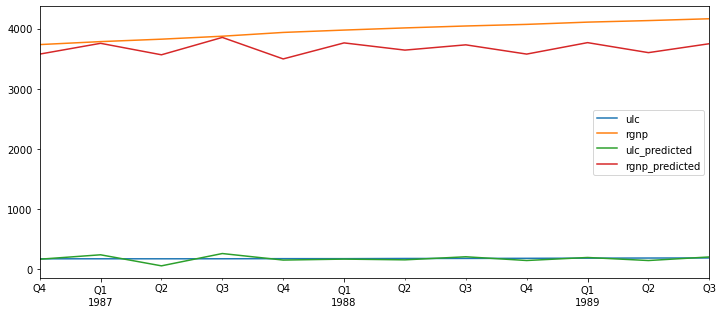

In [38]:
test_vs_pred.plot(figsize=(12,5))

### Evaluate the model using MSE and RMSE

In [47]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['ulc_predicted'],test_df['ulc']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['ulc']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_predicted'],test_df['rgnp']))
print('Mean value of RGNP is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['rgnp']),rmse_rgnp))

Mean value of ULC is : 178.56666666666666. Root Mean Squared Error is :50.85812100085795
Mean value of RGNP is : 3970.6916666666666. Root Mean Squared Error is :339.4977536455003


### Forecast future values

In [39]:
test_df.index.min(), test_df.index.max()

(Timestamp('1986-10-01 00:00:00'), Timestamp('1989-07-01 00:00:00'))

In [42]:
# forecast from 1989-10-01 to 2000-01-01
start='1989-10-01'            # start="1986-10-01",
end='2000-01-01' # end='1989-07-01'

predict_f = fitted_model.get_prediction(start, end)

# get the means of the predictions
predictions_f = predict_f.predicted_mean

In [43]:
predictions_f.columns=['ulc_predicted','rgnp_predicted']
predictions_f

,ulc_predicted,rgnp_predicted
1989-10-01,149.318279,3585.494947
1990-01-01,191.414096,3755.359497
1990-04-01,149.894519,3602.050862
1990-07-01,201.873948,3744.893118
1990-10-01,145.536441,3590.239449
1991-01-01,196.341435,3756.884585
1991-04-01,149.703201,3595.638964
1991-07-01,198.672657,3746.806701
1991-10-01,147.288332,3594.960106
1992-01-01,196.958032,3752.660232
